<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Univariate-Normal-Distribution" data-toc-modified-id="-Univariate-Normal-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Univariate Normal Distribution</font></a></span></li><li><span><a href="#-Multivariate-Normal-Distribution-(MND)" data-toc-modified-id="-Multivariate-Normal-Distribution-(MND)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Multivariate Normal Distribution (MND)</font></a></span><ul class="toc-item"><li><span><a href="#-Expectation-and-Covariance-Matrix" data-toc-modified-id="-Expectation-and-Covariance-Matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Expectation and Covariance Matrix</font></a></span></li><li><span><a href="#-Linear-Combination-of-Normal-Distribution" data-toc-modified-id="-Linear-Combination-of-Normal-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Linear Combination of Normal Distribution</font></a></span></li><li><span><a href="#-Inverse-and-Positive-Definite" data-toc-modified-id="-Inverse-and-Positive-Definite-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><font face="gotham" color="purple"> Inverse and Positive Definite</font></a></span></li><li><span><a href="#-Inverse-and-Symmetry" data-toc-modified-id="-Inverse-and-Symmetry-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><font face="gotham" color="purple"> Inverse and Symmetry</font></a></span></li><li><span><a href="#-Bivariate-Normal-Distribution" data-toc-modified-id="-Bivariate-Normal-Distribution-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><font face="gotham" color="purple"> Bivariate Normal Distribution</font></a></span></li><li><span><a href="#-Covariance-Matrix" data-toc-modified-id="-Covariance-Matrix-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><font face="gotham" color="purple"> Covariance Matrix</font></a></span></li><li><span><a href="#-Isocontours" data-toc-modified-id="-Isocontours-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><font face="gotham" color="purple"> Isocontours</font></a></span></li><li><span><a href="#-Covariance-Matrix-with-Nonezero-Covariance" data-toc-modified-id="-Covariance-Matrix-with-Nonezero-Covariance-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span><font face="gotham" color="purple"> Covariance Matrix with Nonezero Covariance</font></a></span></li></ul></li><li><span><a href="#-Quadratic-Form-of-Normal-Distribution" data-toc-modified-id="-Quadratic-Form-of-Normal-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font face="gotham" color="purple"> Quadratic Form of Normal Distribution</font></a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
import warnings
warnings.filterwarnings("ignore")

也许这是线性代数中最重要的应用之一。在转向多元正态分布之前，我们将逐渐建立直觉。

# <font face="gotham" color="purple"> 单变量正态分布

单变量正态分布的概率密度函数（PDF）由以下公式给出:

$$
p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}
$$

$p(x; \mu, \sigma^2)$ 中的符号表示随机变量为 $x$，参数为 $\mu$ 和 $\sigma^2$，这并不是通常表示条件概率的符号，如 $p(x|y)$。

注意，$-\frac{1}{2\sigma^2}(x-\mu)^2$ 是一个二次函数，这是我们在之前章节中见过的二次型的一维版本。

如果我们定义 $\sigma = 2$，$\mu = 1$，让我们绘制二次函数及其指数。

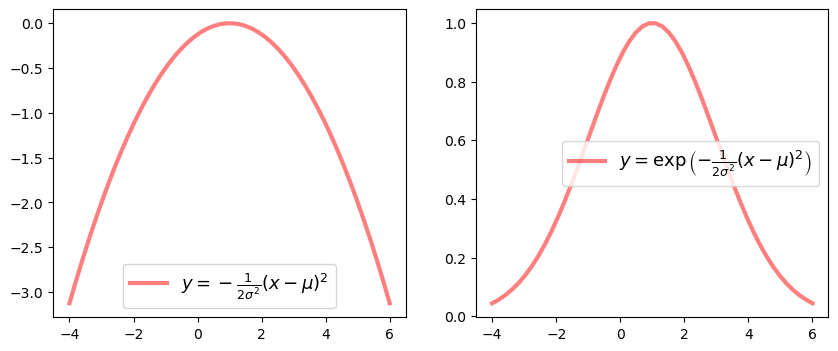

In [3]:
sigma = 2
mu = 1
x = np.linspace(-4, 6)
y = -1/(2*sigma**2)*(x-mu)**2

fig, axs = plt.subplots(1, 2, figsize = (10, 4))
axs[0].plot(x, y, lw = 3, color = 'r', alpha = .5,
            label = r'$y=-\frac{1}{2\sigma^2}(x-\mu)^2$')
axs[0].legend(loc ='best', fontsize = 13)

axs[1].plot(x,np.exp(y), lw = 3, color = 'r', alpha = .5, 
            label = r'$y=\exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}$')
axs[1].legend(loc ='best', fontsize = 13)
plt.show()

前面的常数 $\frac{1}{\sqrt{2\pi}\sigma}$ 是一个归一化因子，它确保整个函数的积分等于 $1$。

$$
 \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi} \sigma}\exp \left(-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right)dx=1
$$

要绘制一维正态分布的概率密度函数，最简单的方法是使用Scipy的正态分布函数 ```sp.stats.norm.pdf()```，我们可以指定 $\mu$ 和 $\sigma$。

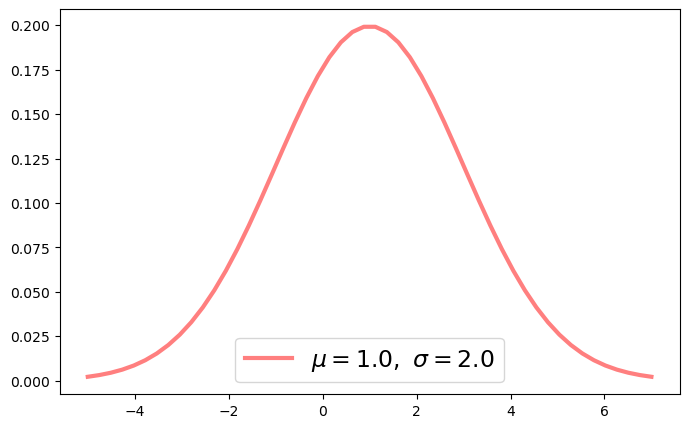

In [4]:
x = np.linspace(-5, 7)
mu = 1
sigma = 2

y = sp.stats.norm.pdf(x, loc = mu, scale = sigma)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, lw = 3, color = 'r', alpha = .5, 
        label = r'$\mu = %.1f,\  \sigma = %.1f$'%(mu, sigma))
ax.legend(loc ='best', fontsize= 17)
plt.show()

这就是我们需要了解的关于一元分布的全部内容！

要了解更多详情，请查看我的<font face="gotham" color="red">基础统计学</font>笔记。

# <font face="gotham" color="purple"> 多元正态分布（MND）

多元正态分布的概率密度函数（PDF）是

$$
p(\mathbf{x} ; \mu, \Sigma)=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right) \tag{1}\label{1}
$$

在分析概率密度函数之前，我们应该了解一些随机向量的基础知识。

## <font face="gotham" color="purple"> 期望和协方差矩阵

考虑一个随机$n$-向量$\mathbf{x}$，其期望定义为

$$
E(\mathbf{x}) = 
\left[
\begin{matrix}
E(x_1)\\E(x_2)\\ \vdots \\E(x_n)
\end{matrix}
\right]
$$

$\mathbf{x}$的方差是一个协方差矩阵，表示为

$$
\begin{aligned}
\Sigma_{\mathbf{x} \mathbf{x}}=\operatorname{Var}(\mathbf{x}) &=E\left[(\mathbf{x}-\mu)(\mathbf{x}-\mu)^T\right]\\
&=\left[\begin{array}{cccc}
\operatorname{Var}\left(x_{1}\right) & \operatorname{Cov}\left(x_{1}, x_{2}\right) & \dots & \operatorname{Cov}\left(x_{1}, x_{n}\right) \\
\operatorname{Cov}\left(x_{2}, x_{1}\right) & \operatorname{Var}\left(x_{2}\right) & \dots & \operatorname{Cov}\left(x_{2}, x_{n}\right) \\
\vdots & \vdots & \ddots & \vdots \\
\operatorname{Cov}\left(x_{n}, x_{1}\right) & \operatorname{Cov}\left(x_{n}, x_{2}\right) & \dots & \operatorname{Var}\left(x_{n}\right)
\end{array}\right]
\end{aligned}
$$

## <font face="gotham" color="purple"> 正态分布的线性组合

正如你所猜想的那样，一系列正态分布的线性组合也将是一个正态分布。假设我们有另一个随机向量 $\pmb{z}$

$$
\mathbf{z}=
\left[
\begin{matrix}
z_1\\z_2\\ \vdots \\z_n
\end{matrix}
\right]
$$

其中 $z_i\sim iid(0,\  \sigma^2)$

对于任意满秩矩阵 $A_{n\times n}$ 和随机正态向量 $\mathbf{x}$，可以写成

$$
\mathbf{x} = A\mathbf{z}
$$

这简单地说明每个 $x_i, i=(1,2,...,n) $ 都是 $\mathbf{z}$ 的线性组合。

如果 $\mathbf{\mu} = \mathbf{0}$，那么 $\mathbf{x}$ 的方差是

$$
\operatorname{Var}(\mathbf{x})=E\left(\mathbf{x} \mathbf{x}^{T}\right)={A }E\left(\mathbf{z} \mathbf{z}^{T}\right) {A}^{T}={A} \mathbf{I} {A}^{T}={A} {A}^{T}
$$

协方差矩阵 ${AA}^T$ 是半正定矩阵，设 $\mathbf{x}$ 是一个 $n$-向量，则

$$
\mathbf{x}^T{AA}^T\mathbf{x}= ({A}^T\mathbf{x})^T({A}^T\mathbf{x}) = \|{A}^T\mathbf{x}\|^2 \geq 0
$$

这也意味着 ${AA}^T$ 的所有特征值也是非负的，参考第17章中关于正定矩阵的部分。

## <font face="gotham" color="purple"> 逆矩阵和正定矩阵

如果 $ {A}_{n\times n}$ 是正定且对称的，则所有特征值都大于 $0$。但如果存在 $0$ 特征值，我们得到

$$
 {A\mathbf{x}} =  {0}
$$

由于 $ {\mathbf{x}}$ 是一个非平凡解（特征向量始终非零），因此 $ {A}$ 必须是非可逆的。

因此，如果 $ {A}$ 是正定的，则 $ {A}$ 没有 $ {0}$ 特征向量，这意味着它是可逆的。

## <font face="gotham" color="purple"> 逆与对称性

与上一节相同的 $ {A}$，我们有 $ {A} {A}^{-1}=\mathbf{I}$。取转置，我们得到

$$
( {A}^{-1})^T {A} = ( {A}^{T})^{-1} {A}=   {A}^{-1} {A}=\mathbf{I}
$$

我们可以看到 $( {A}^{-1})^T= {A}^{-1}$，$ {A}^{-1}$ 也是一个对称矩阵。


现在我们可以证明 $ A^{-1}$ 也是正定的。

$$
A \mathbf{v}=\lambda \mathbf{v} \Longrightarrow A^{-1} A \mathbf{v}=\lambda A^{-1} \mathbf{v} \Longrightarrow\frac{1}{\lambda} \mathbf{v} = A^{-1}\mathbf{v}
$$

我们已经证明了如果 $ {A}$ 有特征值 $\lambda$，那么 $ {A}^{-1}$ 就有 $\frac{1}{\lambda}$ 作为它的特征值。

如果 $\lambda>0$，显然 $\frac{1}{\lambda}>0$，因此 $ {A}^{-1}$ 也是正定的。

## <font face="gotham" color="purple"> 双变量正态分布

在多元正态分布（MND）的概率密度函数中，指数函数的参数是 $-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T} \Sigma^{-1}(\mathbf{x}-\mathbf\mu)$，这是一个二次型。

$\Sigma$ 是对称正定半定矩阵，所以对于任意向量 $\mathbf{x} = \mathbf{\mu}$，$\Sigma^{-1}$ 也是正半定的。

在前面加一个负号后，我们得到负半定的二次型

$$
-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}( \mathbf{x}-{\mu})\leq 0
$$

如果我们定义一个简单的双变量情况，那么这个二次型是

\begin{align}
-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{cc}
\sigma_{1}^{2} & 0 \\
0 & \sigma_{2}^{2}
\end{array}\right]^{-1}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]&=
-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{cc}
\frac{1}{\sigma_{1}^{2}} & 0 \\
0 & \frac{1}{\sigma_{2}^{2}}
\end{array}\right]\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]\\
&=-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{l}
\frac{1}{\sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right) \\
\frac{1}{\sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)
\end{array}\right]\\
& = -\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}
\end{align}

进一步地，我们给出了 $\sigma$ 和 $\mu$ 的值。

$$
\sigma_1 = 2,\  \sigma_2 = 3,\  \mu_1 = 0,\  \mu_2 = 0
$$

我们可以可视化二次型及其指数函数。

In [8]:
%matplotlib notebook
x1, x2 = np.linspace(-10, 10, 30), np.linspace(-10, 10, 30)
X1, X2 = np.meshgrid(x1, x2)

sigma1 = 2
sigma2 = 3
mu1, mu2 = 0, 0 

Z = -1/(2*sigma1**2)*(X1 - mu1)**2 - 1/(2*sigma2**2)*(X2 - mu2)**2

fig, axs = plt.subplots(figsize = (8, 4))
axs = fig.add_subplot(121, projection='3d')
axs.plot_surface(X1,X2,Z,cmap='coolwarm')
axs.set_title(r'$-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}$')
cset = axs.contour(X1, X2, Z, zdir='z', offset=-17.5, cmap='coolwarm') 
cset = axs.contour(X1, X2, Z, zdir='x', offset=-10, cmap='coolwarm') 
cset = axs.contour(X1, X2, Z, zdir='y', offset=10, cmap='coolwarm') 

expZ = np.exp(Z)
axs = fig.add_subplot(122, projection='3d')
axs.plot_surface(X1,X2,expZ,cmap='coolwarm')
axs.set_title(r'$\exp{\left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)}$')

plt.show()

<IPython.core.display.Javascript object>

此外，生成双变量正态分布最方便的方法是使用 Scipy 中的多元正态分布函数。

In [9]:
%matplotlib notebook
mu_1 = 0
sigma_1 = 2

mu_2 = 0
sigma_2 = 3

#Create grid and multivariate normal
x = np.linspace(-5,5,30)
y = np.linspace(-5,5,30)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y 
norm = sp.stats.multivariate_normal([mu_1, mu_2], [[sigma_1, 0], [0, sigma_2]]) # frozen 

#Make a 3D plot
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, norm.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_title('Bivariate Normal Distribution, $\sigma_1 = 2$, $\sigma_2 = 3$, $\mu_1 = 0$, $\mu_2 = 0$')

plt.show()

<IPython.core.display.Javascript object>

既然我们已经展开了双变量二次型，回到多元正态分布的概率密度函数（式 $\eqref{1}$），我们有


\begin{aligned}
 p(\mathbf{x};\mathbf{\mu}, \Sigma)
&=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)\\
&=\frac{1}{\sqrt{2 \pi} \sigma_{1}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}\right) \cdot \frac{1}{\sqrt{2 \pi} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)
\end{aligned}


我们发现双变量正态分布可以分解为<font face="gotham" color="red">两个单变量正态分布的乘积</font>！

## <font face="gotham" color="purple"> 协方差矩阵

协方差矩阵是塑造分布的最重要因素。使用 Scipy 中的多元正态分布随机生成器，我们可以了解协方差矩阵的一些直觉。

In [10]:
fig = plt.figure(figsize = (8, 8))
fig.suptitle('Bivariate Normal Randome Draw, $\rho_{12}=\rho_{21}=0$')
########
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(221)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title(string, color = 'red')
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(222)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 5, 5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(223)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(224)
ax.scatter(X[:,0], X[:,1], s = 1)
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
ax.axis('equal')


plt.show()

<IPython.core.display.Javascript object>

注意，上面的图都采用了对角协方差矩阵，即 $\rho_{12} = \rho_{21} =0$。

$$
\left[
\begin{matrix}
\sigma_1^2 & 0\\
0 & \sigma_2^2
\end{matrix}
\right]
$$

为了理解协方差矩阵超越直觉，我们需要分析特征向量和特征值。但我们知道对角矩阵的所有特征值都在主对角线上，它们分别是 $\sigma_1^2$ 和 $\sigma_2^2$。

## <font face="gotham" color="purple"> 等高线

等高线就是轮廓线。它们是等高高度 $z$ 的投影到 $xy$ 平面上的轮廓。让我们从理论上展示它们的样子。

我们知道特征值，直观上我们也感觉到特征值与等高线的形状有关，这在上面的散点图中得到了展示。

我们将推导一个等高线的方程。

我们在前一节中看到

$$
p(x ; \mu, \Sigma)=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)
$$

为了得到轮廓线的方程，我们设置 $p(x ; \mu, \Sigma) = c$。

$$
\begin{aligned}
c &=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right) \\
2 \pi c \sigma_{1} \sigma_{2} &=\exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right) \\
\log \left(2 \pi c \sigma_{1} \sigma_{2}\right) &=-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2} \\
\log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right) &=\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}+\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2} \\
1 &=\frac{\left(x_{1}-\mu_{1}\right)^{2}}{2 \sigma_{1}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}+\frac{\left(x_{2}-\mu_{2}\right)^{2}}{2 \sigma_{2}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}
\end{aligned}
$$

定义

$$
a=\sqrt{2 \sigma_{1}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)} \\
b=\sqrt{2 \sigma_{2}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}
$$

则得到

$$
\left(\frac{x_{1}-\mu_{1}}{a}\right)^{2}+\left(\frac{x_{2}-\mu_{2}}{b}\right)^{2}=1
$$

这是椭圆的方程，$a$ 和 $b$ 是主/次半轴。

这个方程可以写成

$$
x_2 = b\sqrt{1-\left(\frac{x_1-\mu}{a}\right)^2}+\mu
$$

然而，这变成了一个函数，只对椭圆的一半进行绘制有效。在处理平方根时会遇到问题。

还要注意到

$$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$$

这意味着协方差矩阵的奇异值决定了分布的形状。这个表达式也解释了为什么我们使用 $\sigma$ 来表示奇异值，因为它实质上是标准差。

In [11]:
mu1 = 0    
mu2 = 0   

a= 2    #radius on the x1-axis
b= 3     #radius on the x2-axis

x1 = np.arange(-5, 5, .0001)
fig, ax = plt.subplots(figsize = (7, 7))
x2 = b*np.sqrt(1 - ((x1-mu1)/a)**2) + mu2
minus_x2 = - b*np.sqrt(1 - ((x1-mu1)/a)**2) + mu2
ax.plot(x1 , x2, color = 'r', lw = 3, alpha = .5)
ax.plot(x1 , -x2, color = 'r', lw = 3, alpha = .5)
ax.grid(color='lightgray',linestyle='--')
ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

显然，椭圆绘制不是最佳工具，我们还有另一种工具 - <font face="gotham" color="red">参数方程</font> - 专门设计用于不能方便地通过函数绘制的图形。

$$
x = a \cos{(t)}\\
y = b \sin{(t)}
$$

其中 $t \in (0,\  2\pi]$。

那么让我们绘制椭圆以及对应双变量正态分布的随机抽样。

In [12]:
t = np.arange(0, 2.1*np.pi, .1) # set 2.1*pi to close the ellipse
a = 2 
b = 3

x = a * np.cos(t)
y = b * np.sin(t)
######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)
axs.plot(x, y, color = 'r', lw = 3, alpha = .5)
axs.scatter(0, 0, s = 20, color = 'k')
axs.plot([0, 0], [0, 3], lw = 2, color = 'g')
axs.plot([0, 2], [0, 0], lw = 2, color = 'b')

string = r'$a = %.1f$'%a
axs.text(x = .6, y = 0.05, s = string)
string = r'$b = %.1f$'%b
axs.text(x = 0.1, y = 1, s = string, rotation = 90)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
# ax.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)
a = 3 
b = 2

x = a * np.cos(t)
y = b * np.sin(t)
axs.plot(x, y, color = 'r', lw = 3, alpha = .5)
axs.scatter(0, 0, s = 20, color = 'k')
axs.plot([0, 0], [0, 2], lw = 2, color = 'g')
axs.plot([0, 3], [0, 0], lw = 2, color = 'b')

string = r'$a = %.1f$'%a
axs.text(x = .6, y = 0.05, s = string)
string = r'$b = %.1f$'%b
axs.text(x = 0.1, y = 1, s = string, rotation = 90)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

这里有一个侧面说明，一些人可能更喜欢使用热力图来表示分布。

In [13]:
fig, axs = plt.subplots(figsize = (5, 5))
N_numbers = 1000
N_bins = 100
k = 10000

mu1, mu2 = 0, 0
sigma1, sigma2 = 2, 4
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, -1.5], [-1.5, sigma2]])

mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)           
axs.hist2d(X[:,0], X[:,1], bins=N_bins, density=False, cmap='plasma')

axs.set_title('Heatmap of 2D Bivariate Random Draws')
axs.set_xlabel('x axis')
axs.set_ylabel('y axis')
axs.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

## <font face="gotham" color="purple"> 带有非零协方差的协方差矩阵

我们大多数情况下看到的是协方差矩阵是对角的，那么如果它们只是对称但不是对角的呢？

$$
\Sigma =
\left[
\begin{matrix}
1 & -1.2\\
-1.2 & 1.5
\end{matrix}
\right]
$$

让我们看一下图表。

In [14]:

######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
rho12 = -1.2
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], [rho12, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'r', alpha = .5)

string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)

###################
mu1, mu2 = 0, 0
rho12 = .5
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], [rho12, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'b', alpha = .5)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

很明显，协方差决定了旋转角度。

旋转矩阵是一个线性变换算子，形式为

$$
\left[
\begin{matrix}
\cos \theta & -\sin\theta\\
\sin \theta & \cos\theta
\end{matrix}
\right]
$$

旋转矩阵与协方差矩阵密切相关。

接下来，我们将使用参数方程绘制圆，并通过协方差矩阵对它们进行变换。

In [15]:

######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
rho12 = -1.2
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], 
                  [rho12, sigma2]])

###############
a = 1
b = 1
t = np.arange(0, 2.1*np.pi, .1)
x = a * np.cos(t)
y = b * np.sin(t)

B = np.concatenate((x, y)).reshape(2,66)
C= Sigma@B
axs.plot(C[0,:], C[1,:], color = 'b', lw = 3, alpha = .5)
###################

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'r', alpha = .5)

string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)

###################
mu1, mu2 = 0, 0
rho12 = .5
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], 
                  [rho12, sigma2]])

############
a = 1
b = 1
x = a * np.cos(t)
y = b * np.sin(t)

B = np.concatenate((x, y)).reshape(2,66)
C= Sigma@B
axs.plot(C[0,:], C[1,:], color = 'r', lw = 3, alpha = .5)
###########

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'b', alpha = .5)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

我们可以看到，协方差矩阵的作用类似于旋转矩阵。

# <font face="gotham" color="purple"> 正态分布的二次型

如果一个随机正态向量 $\mathbf{x} \sim N(\mathbf{\mu}, \Sigma)$，线性变换 $A\mathbf{x}=\mathbf{z}$ 也是正态分布的，但我们希望了解更多关于 $A\mathbf{x}$ 的信息。分别取期望和方差，

$$
E(\mathbf{z})= AE(\mathbf{x}) = AE(\mathbf{x})= A\mathbf{\mu}
$$

\begin{align}
\text{Var}(\mathbf{z})&= E[(\mathbf{z} - E(\mathbf{z}))(\mathbf{z}-E(\mathbf{z}))^T]\\
&= E[(A\mathbf{x} - A\mathbf{\mu}))(A\mathbf{x}-A\mathbf{\mu})^T]\\
& = AE[(\mathbf{x}-\mathbf{\mu})(\mathbf{x}-\mathbf{\mu})^T]A^T\\
& = A\Sigma A^T
\end{align}

其中 $A$ 是确定性矩阵。

If $\Sigma = \sigma^2 \mathbf{I}$, then $\text{Var}(\pmb{z})= \sigma^2AA^T$.